<a href="https://colab.research.google.com/github/rohit-anan/Deep-learning-projects/blob/main/Linear_Classifier_in_pure_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LINEAR CLASSIFIER IN PURE TENSORFLOW

* ## Generating two classes of random points in a 2D plane

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
num_samples_per_class = 1000
neg_class = np.random.multivariate_normal(
    mean = [0,3],
    cov=[[1,0.5],[0.5,1]],
    size = num_samples_per_class
)

In [ ]:
pos_class = np.random.multivariate_normal(
    mean = [3,0],
    cov=[[1,0.5],[0.5,1]],
    size = num_samples_per_class
)

In [ ]:
pos_shape = pos_class.shape
neg_shape = neg_class.shape
print(f"shape of negative class is:{pos_shape}")
print(f"shape of positive class is:{neg_shape}")

shape of negative class is:(1000, 2)
shape of positive class is:(1000, 2)


* ## Stacking the two classes in an array of shape (2000,2)

In [ ]:
inputs = np.vstack((neg_class,pos_class)).astype(np.float32)

In [ ]:
print(f"shape of the stacked arrays is:{inputs.shape}")

shape of the stacked arrays is:(2000, 2)


* ### Generating the corresponding targets (0 and 1)

An array of zeros and ones of the shape (2000,1), where *targets[i,0]* is 0 if *inputs[i]* belongs to class 0 (and inversely).

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class,1),dtype="float32"),
                     np.ones((num_samples_per_class,1),dtype="float32")))

* ### Plotting our data

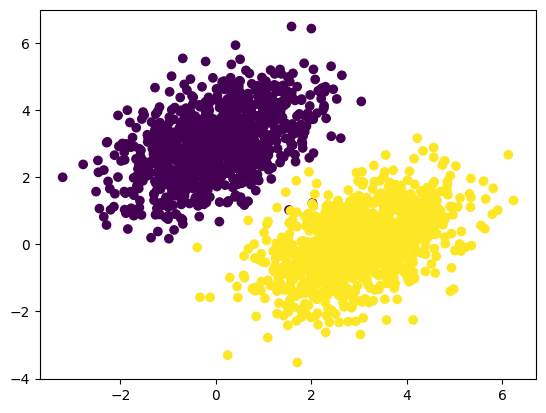

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0],inputs[:,1],c=targets[:,0])
plt.show()

* ### Creating the linear classifier variables

In [ ]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim,output_dim)))
b = tf.Variable(initial_value=tf.random.uniform(shape=(output_dim,)))

In [ ]:
print(f"shape of weight is:{W.shape}")
print(f"shape of bias is:{b.shape}")

shape of weight is:(2, 1)
shape of bias is:(1,)


* ### Forward Pass Function

In [ ]:
def model(inputs):
  return tf.matmul(inputs,W)+b

* ### The mean squared error loss function

In [ ]:
def square_loss(targets,predictions):
  per_sample_loss=tf.square(targets-predictions)
  return tf.reduce_mean(per_sample_loss)

* ### The training step function

In [ ]:
learning_rate = 0.1

def training_step(inputs,targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions,targets)
  grad_loss_wrt_w,grad_loss_wrt_b = tape.gradient(loss,[W,b])
  W.assign_sub(grad_loss_wrt_w*learning_rate)
  b.assign_sub(grad_loss_wrt_b*learning_rate)
  return loss

* ### The batch training loop

In [ ]:
for step in range(40):
  loss = training_step(inputs,targets)
  print(f"Loss at step {step}:{loss:.4f}")

Loss at step 0:1.6153
Loss at step 1:0.2023
Loss at step 2:0.0536
Loss at step 3:0.0346
Loss at step 4:0.0318
Loss at step 5:0.0311
Loss at step 6:0.0307
Loss at step 7:0.0304
Loss at step 8:0.0301
Loss at step 9:0.0298
Loss at step 10:0.0296
Loss at step 11:0.0293
Loss at step 12:0.0291
Loss at step 13:0.0289
Loss at step 14:0.0287
Loss at step 15:0.0286
Loss at step 16:0.0284
Loss at step 17:0.0283
Loss at step 18:0.0281
Loss at step 19:0.0280
Loss at step 20:0.0279
Loss at step 21:0.0278
Loss at step 22:0.0277
Loss at step 23:0.0276
Loss at step 24:0.0276
Loss at step 25:0.0275
Loss at step 26:0.0274
Loss at step 27:0.0274
Loss at step 28:0.0273
Loss at step 29:0.0273
Loss at step 30:0.0272
Loss at step 31:0.0272
Loss at step 32:0.0272
Loss at step 33:0.0271
Loss at step 34:0.0271
Loss at step 35:0.0271
Loss at step 36:0.0270
Loss at step 37:0.0270
Loss at step 38:0.0270
Loss at step 39:0.0270


* ### Let's plot this graph

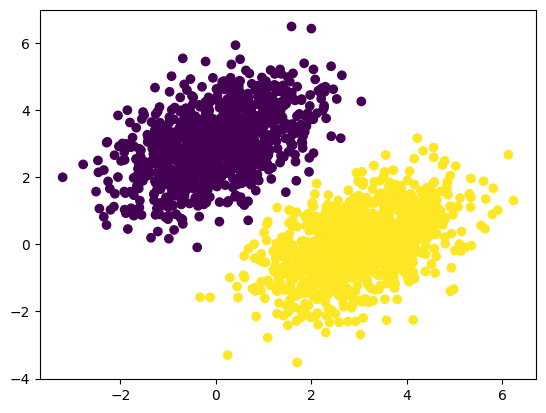

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:,0],inputs[:,1],c=predictions[:,0]>0.5)
plt.show()

For a point [x,y] our predicition is:

predicition == [[w1],[w2]]*[x,y]+b == w1*x + w2*x + b. ----- Eq1

Where if Eq1 > 0.5 it belongs to class1 and if it is less than 0.5, it belongs to class0.

Let us plot this line.

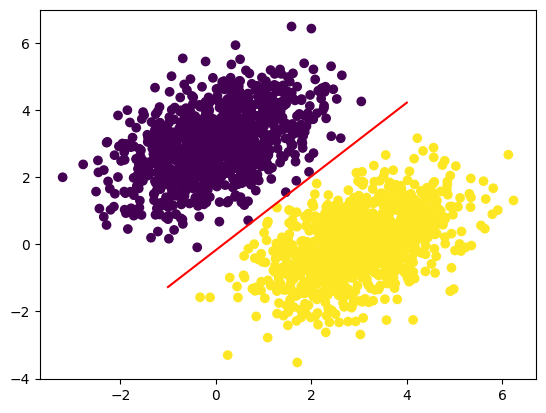

In [ ]:
x = np.linspace(-1,4,100)
y = -W[0]/W[1]*x + (0.5-b)/W[1]
plt.plot(x,y,"-r")
plt.scatter(inputs[:,0],inputs[:,1],c=predictions[:,0]>0.5)

## CONCLUSION

We have successfully determined the parameters of a hyperplane, neatly seperating the two classes of data